<a href="https://colab.research.google.com/github/MarioQFFF/LHCb_2023.ipynb/blob/main/ML_MNIST_NN_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.keras as keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load training and test images (x), and their respective classified labels (y).
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Training data shape:  (60000, 784)
Test data shape (10000, 784)
First 10 training labels as digits:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]



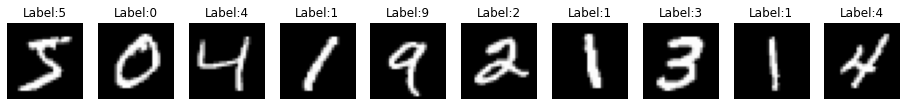

In [42]:
# Investigate the data

print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28
print("First 10 training labels as digits:\n", y_train[:10])
print("")

# Plot the first 10 images
### STUDENT CODE HERE ###
plt.figure(figsize=[16,16])
for i in range (10):
  for j in range (10):
   if y_train[i][j] == 1:
    plt.subplot(1,10,i+1)
    plt.title("Label:" + str(j))
    plt.imshow(x_train[i].reshape([28,28]), cmap="gray")
    plt.axis("off")
plt.show()
### --> Find a way to plot a sample of 10 images of hand-written digits in the training data
### END STUDENT CODE ###

In [4]:
# Pre-processing of data

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
print("reshaped training data format: ", x_train.shape) # -- 60000 images, now flat arrays of 28*28 long

# one-hot encode the labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 10 training lables as one-hot encoded vectors:\n", y_train[:10])

reshaped training data format:  (60000, 784)
First 10 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [39]:
# Build the network
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

model = Sequential()

# The input layer requires the special input_shape parameter, which should equal the shape of our training data.
# The output layer must be the same size as the (one-hot encoded) labels.
# Choose a non-linear activation function such as a sigmoid, or relu.
# For classification purposes, where the outputs are normalized 'probabilities' between the classes,
#  one typically uses the softmax activation function for the last layer.

### STUDENT CODE HERE ###
model.add(Dense(units=32, activation="sigmoid", input_shape=(image_vector_size,) ))
model.add(Dense(units=num_classes, activation="softmax"))
### --> add Dense (fully connected) layers to the model to connect input to output, using model.add().
###  Make sure that the dimensionality is correct: input should be # pixels large, 
###  output should be #classes large. Google is your friend.
### END STUDENT CODE ###

# Print model summary. Shows network layout, and # free parameters (weights + biases) to adapt while learning.
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Compile the model

# A good loss function for probability classification that works well with softmax is the 'categorical crossentropy'.
#  It's a function of the difference between the predicted y (from running the image through the network),
#  and the actual label y that we get from the dataset. The larger the loss, the worst our network is performing.
# A good optimizer is the stochastic gradient descent (sgd) or adam.

### STUDENT CODE HERE ###
model.compile(optimizer= "sgd", loss="categorical_crossentropy", metrics= ["accuracy"])
### --> Call model.compile with the right arguments.
### END STUDENT CODE ###

Test loss: 0.221
Test accuracy: 0.933
313/313 [==============================] - 1s 2ms/step


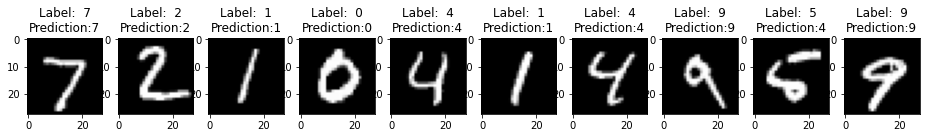

In [75]:
# Let's see how good the model 'predicts' some hand-written digits in our test dataset, without training.
# It's probably random: so for 10 digits, it should get an accuracy around 0.1 .

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

y_pred_test = model.predict(x_test)

### STUDENT CODE HERE ###
plt.figure(figsize= [16,16])
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.title("Label:  {0}\nPrediction:{1}".format(np.argmax(y_test[i]),np.argmax(y_pred_test[i])))
  plt.imshow(x_test[i].reshape([28,28]), cmap = "gray");
### --> call model.predict() on the test images, and show the predictions of the
###  untrained model for the first 10 images. Also, plot those images, as you did above.
### END STUDENT CODE ###

In [89]:
# Train the model.

# BATCH_SIZE defines how many images to process at once.
# EPOCHS defines how often to run over the total data (60000 images)
# (Note that a small part of the train data is internally split off for independent validation of the metrics)

### STUDENT CODE HERE ###
### --> Edit the parameters below to obtain a better accuracy in the training.

BATCH_SIZE = 350
EPOCHS = 20

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_split=.1)

Epoch 1/20
155/155 [==============================] - 1s 9ms/step - loss: 0.1535 - accuracy: 0.9575 - val_loss: 0.1772 - val_accuracy: 0.9498
Epoch 2/20
155/155 [==============================] - 1s 5ms/step - loss: 0.1553 - accuracy: 0.9572 - val_loss: 0.1784 - val_accuracy: 0.9505
Epoch 3/20
155/155 [==============================] - 1s 5ms/step - loss: 0.1545 - accuracy: 0.9570 - val_loss: 0.1765 - val_accuracy: 0.9518
Epoch 4/20
155/155 [==============================] - 1s 5ms/step - loss: 0.1540 - accuracy: 0.9573 - val_loss: 0.1782 - val_accuracy: 0.9505
Epoch 5/20
155/155 [==============================] - 1s 5ms/step - loss: 0.1535 - accuracy: 0.9576 - val_loss: 0.1784 - val_accuracy: 0.9482
Epoch 6/20
155/155 [==============================] - 1s 5ms/step - loss: 0.1546 - accuracy: 0.9574 - val_loss: 0.1778 - val_accuracy: 0.9493
Epoch 7/20
155/155 [==============================] - 1s 5ms/step - loss: 0.1536 - accuracy: 0.9574 - val_loss: 0.1753 - val_accuracy: 0.9505
Epoch 

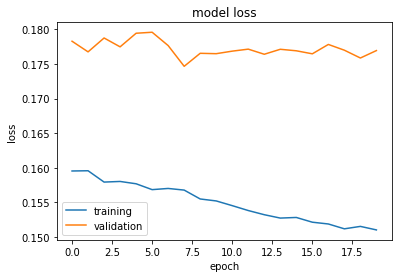

In [86]:
# Plot the progression of the training loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

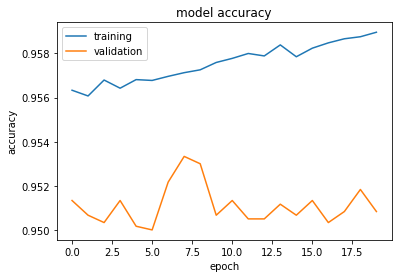

In [87]:
# Plot the progression of the training accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

Test loss: 0.208
Test accuracy: 0.936
313/313 [==============================] - 0s 1ms/step


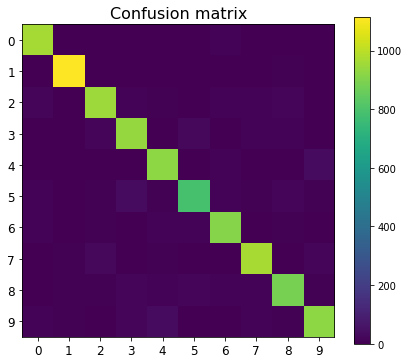

In [91]:
# Evaluate model on test data - how often does the network predict the right label after training?

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Make a confusion matrix to see which numbers are difficult to disentangle

y_pred_test = model.predict(x_test) # obtain one-hot encoded predictions for the x_test images
y_test_index      = [ np.argmax(i) for i in y_test ] # actual number known labels
y_pred_test_index = [ np.argmax(i) for i in y_pred_test ] # actual number predictions
y_pred_test_proba = [ y_pred_test[i][ y_pred_test_index[i] ] for i in range(len(y_test_index)) ] # probabilities to be correct

from sklearn.metrics import confusion_matrix
### STUDENT CODE HERE ###
plt.figure(figsize= [7,6])
plt.title("Confusion matrix", fontsize = 16)
plt.imshow(confusion_matrix(y_test_index, y_pred_test_index))
plt.xticks(np.arange(10), np.arange(10), rotation=0, fontsize=12)
plt.yticks(np.arange(10), np.arange(10),fontsize=12)
plt.colorbar()
plt.show()
### --> Now predict again the labels for the test images, but after proper training.
###  Build a confusion matrix to show which labels we often confuse with what.
###  (Note that the y_test and y_pred are still one-hot encoded, so you need to get
###   the index of the maximum entry to find the corresponding predicted 'number'.
### END STUDENT CODE ###

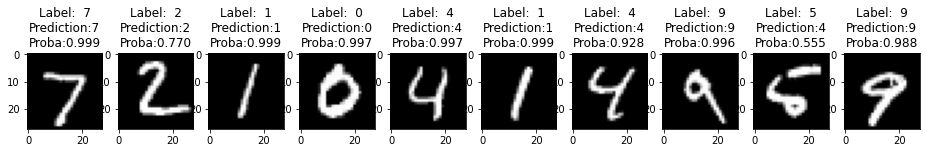

In [95]:
# Show some predicted labels and their probabilities to be correct

### STUDENT CODE HERE ###
plt.figure(figsize=[16,16])
for i in range (10):
   plt.subplot(1,10,i+1)
   plt.title("Label:  {0}\nPrediction:{1}\nProba:{2:.3f}".format(y_test_index[i], y_pred_test_index[i],y_pred_test_proba[i]))
   plt.imshow(x_test[i].reshape([28,28]), cmap="gray")
### --> Now show some hand-written digit images from the test sample, 
###  their corresponding true label, their predicted label from your network,
###  and the probability associated with that prediction.
### END STUDENT CODE ###